In [4]:
# Librerrias 
import numpy as np
import pandas as pd

from scipy import stats

# Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns


#### Probabilidad y Estadística en IA
Teorema de Bayes: 
Imagina que has desarrollado un sistema de IA para identificar si una imagen contiene un objeto específico (por ejemplo, un gato). Después de realizar varias pruebas, obtienes los siguientes datos:</br>
i. La probabilidad de que cualquier imagen elegida al azar contenga un gato (P(Gato)) es 0.2.</br>
ii. Si una imagen no contiene un gato, la probabilidad de que tu IA lo identifique incorrectamente</br>
como gato (P(Detectado|No Gato)) es 0.05.</br>
iii. Si una imagen realmente contiene un gato, la probabilidad de que tu IA lo identifique
correctamente (P(Detectado|Gato)) es 0.95.</br>
1) Si una imagen ha sido clasificada como que contiene un gato por tu IA, ¿cuál es la probabilidad de que realmente contenga un gato? Resuelve utilizando el Teorema de Bayes.</br>

In [3]:
# 1. Probabilidad de gato

P_Gato = 0.2
P_NoGato = 1 - P_Gato
P_Detectado_NoGato = 0.05
P_Detectado_Gato = 0.95

P_Positivo = (P_Detectado_Gato * P_Gato) + (P_Detectado_NoGato * P_NoGato)
print(f"Probabilidad de Positivo: {P_Positivo}")

P_Gato_Positivo = (P_Detectado_Gato * P_Gato) / P_Positivo
print(f"Probabilidad de que sea un Gato dado que es Positivo: {P_Gato_Positivo}")


Probabilidad de Positivo: 0.23
Probabilidad de que sea un Gato dado que es Positivo: 0.8260869565217391


2) Dadas las siguientes cifras de un clasificador binario: </br>
a. Calcula la Precisión, Sensibilidad, Especificidad, Precisión Positiva y Precisión Negativa.</br>
b. Implementa una función en Python que acepte una matriz de confusión y calcule el F1 Score. </br>

 | Matriz  | Score    |
| :---:   | :---: | 
 Verdaderos Positivos (VP)    | 65  |
 Falsos Positivos (FP)             | 10  |
 Verdaderos Negativos (VN)  | 80  | 
 Falsos Negativos (FN)           | 45  |
 
 Traduccion de Matriz </br>

 | |Predicho Positivo | Predicho Negativo |
 |:---: |:---: |:---: |
 | Real Positivo | (VP) 65 | (FN) 45 |
 | Real Negativo | (FP) 10 | (VN) 80|

In [5]:
# Matriz de Confusion

# a. Calcula la Precisión, Sensibilidad, Especificidad, Precisión Positiva y Precisión Negativa.</br>
# b. Implementa una función en Python que acepte una matriz de confusión y calcule el F1 Score. </br>

TP = 65 # True Positives o Verdaderos Positivos
FN = 45 # False Negatives o Falsos Negativos
FP = 10 # False Positives o Falsos Positivos
TN = 80 # True Negatives o Verdaderos Negativos
 
Precision = (TP + TN) / (TP + FP + TN + FN)
Sensibilidad = TP / (TP + FN)
Especificidad = TN / (TN + FP)
PrecisionPositiva = TP / (TP + FP)
PrecisionNegativa = TN / (TN + FN)

print(f"""
Precision: {Precision}
Sensibilidad: {Sensibilidad}
Especificidad: {Especificidad}
Precision Positiva: {PrecisionPositiva}
Precision Negativa: {PrecisionNegativa}
""")

def calculate_f1_score(TP, FN, FP, TN):
    Precision = (TP + TN) / (TP + FP + TN + FN)
    Sensibilidad = TP / (TP + FN)
    F1_Score = 2 * ((Precision * Sensibilidad) / (Precision + Sensibilidad))
    return F1_Score

print(f"F1 Score: {calculate_f1_score(TP, FN, FP, TN)}")


Precision: 0.725
Sensibilidad: 0.5909090909090909
Especificidad: 0.8888888888888888
Precision Positiva: 0.8666666666666667
Precision Negativa: 0.64

F1 Score: 0.6511226252158895



# Distribuciones Estadísticas
Supongamos que eres un científico de datos trabajando en un proyecto de IA para una empresa de comercio electrónico y se te ha encargado analizar estadísticamente el conjunto de tiempos de entrega de productos a los clientes. </br>
Utilizando Python: </br>
a) Carga los datos que se encuentre en el fichero adjunto a este enunciado. </br>
b) Muestra los datos en un histograma y describe las características que notas en el gráfico (simetría, colas, picos, etc.). </br>
c) Analiza las siguientes estadísticas descriptivas: la media, mediana, moda, varianza y desviación estándar. </br>
d) Determina la distribución estadística que mejor se ajuste al dataset, utilizando pruebas de bondad de ajuste como la prueba de Kolmogorov-Smirnov </br>

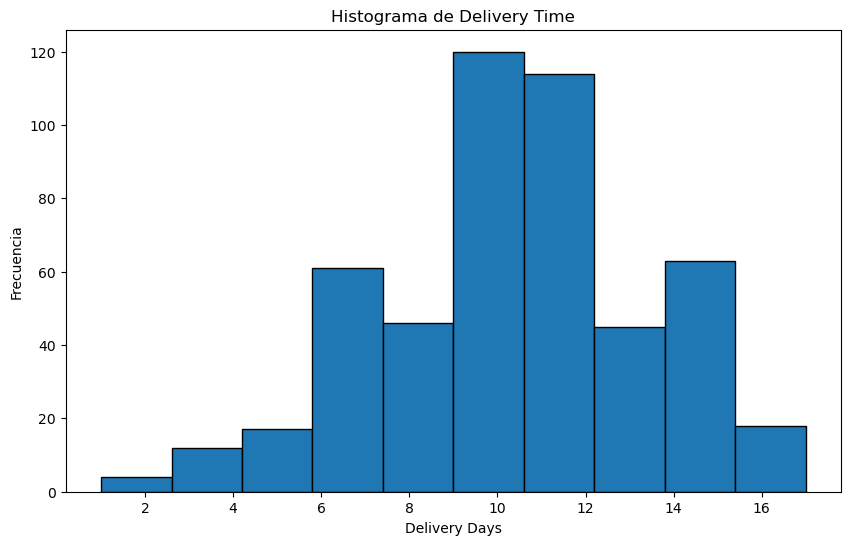

Simetría: -0.19663956793338006
Curtosis: -0.36070039482764793


In [76]:
# 2. Análisis de Datos
# a. Carga el dataset Delivery Times Dataset.csv.
dataset = pd.read_csv('Delivery_Times_Dataset.csv')

# b. Muestra los datos en un histograma y describe las características de la distribución.
plt.figure(figsize=(10, 6))
plt.hist(dataset['Delivery Days'], bins=10, edgecolor='black')
plt.title('Histograma de Delivery Time')
plt.xlabel('Delivery Days')
plt.ylabel('Frecuencia')
plt.show()

# Simetría

skewness = dataset['Delivery Days'].skew()
print(f"Simetría: {skewness}")
# < 0: Asimetría negativa cola a la izquierda
# > 0: Asimetría positiva cola a la derecha
# = 0: Distribución simétrica

# Curtosis (Picos altos y/o bajos)
kurtsis = dataset['Delivery Days'].kurt()
print(f"Curtosis: {kurtsis}")

# = 0: Distribución normal
# > 0: Distribucion con picos altos y colas pesadas
# < 0: Distribucion con picos bajos o plana en este caso es más plana


In [7]:

# c. Calcula la media, mediana, moda, desviación estándar, varianza, rango, mínimo y máximo de la columna Delivery Time.
media = dataset['Delivery Days'].mean()
mediana = dataset['Delivery Days'].median()
moda = dataset['Delivery Days'].mode()
varianza = dataset['Delivery Days'].var()
desviacion_estandar = dataset['Delivery Days'].std()

simetrica = stats.skew(dataset['Delivery Days'])

print(f"""
Media: {media}
Mediana: {mediana}
Moda: {moda}
Varianza: {varianza}
Desviación Estándar: {desviacion_estandar}
Simetría: {simetrica}
""")


Media: 10.302
Mediana: 10.0
Moda: 0    10.0
Name: Delivery Days, dtype: float64
Varianza: 9.549895791583172
Desviación Estándar: 3.0902905675005985
Simetría: -0.19604915694131356



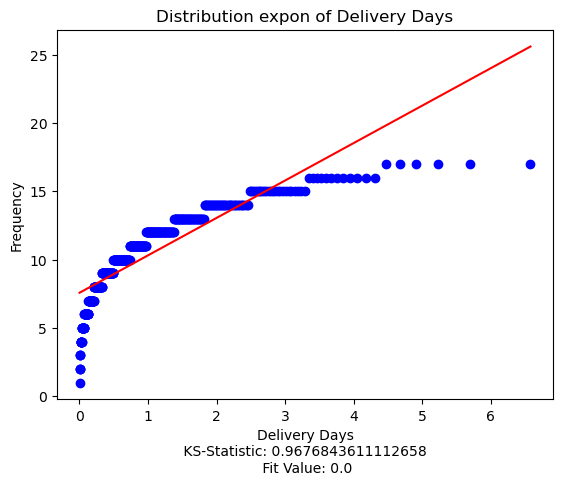

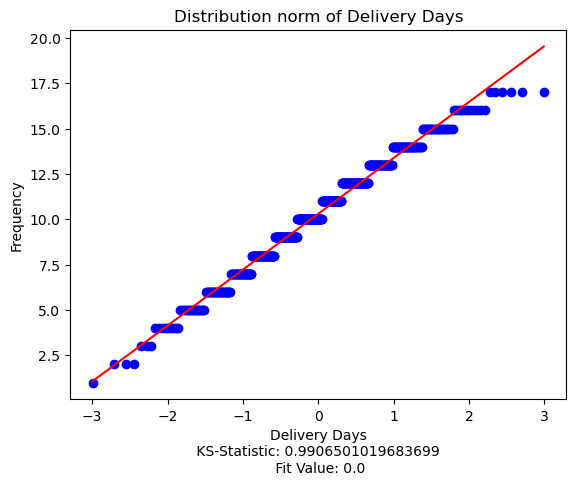

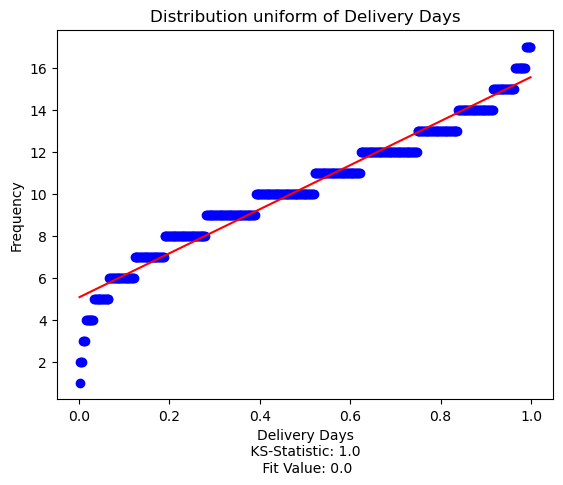

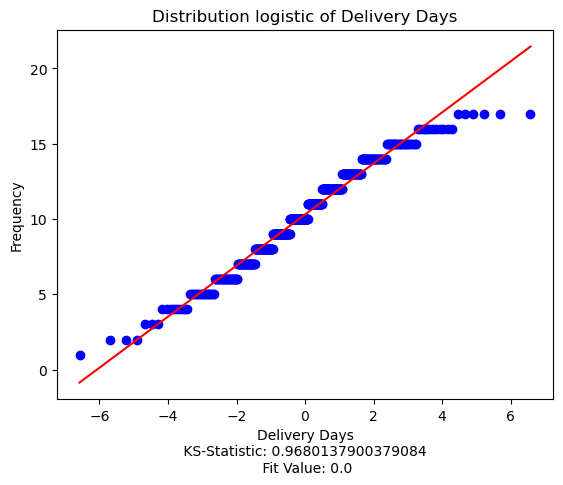

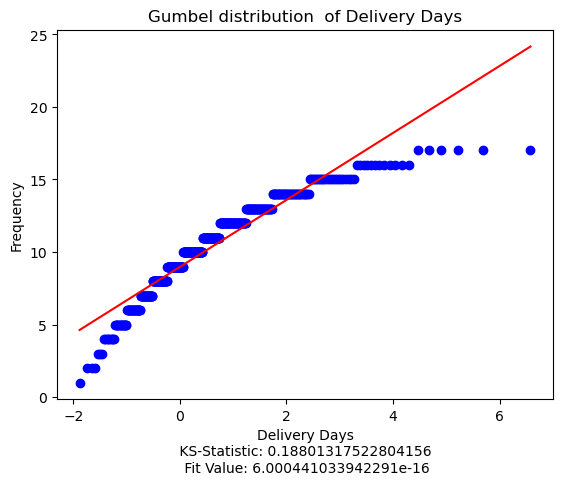

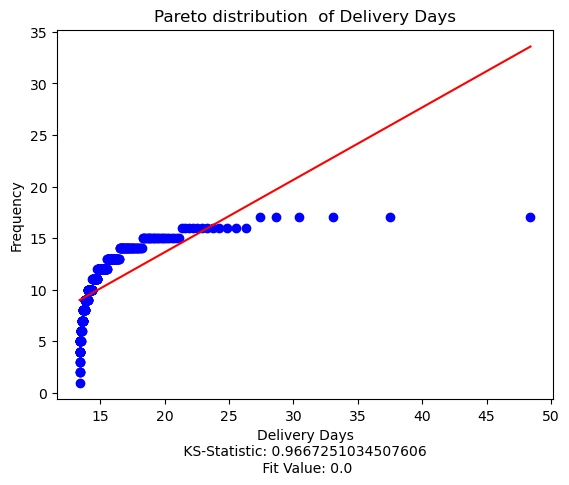

In [91]:
# d) Determina la distribución estadística que mejor se ajuste al dataset, utilizando pruebas de bondad de ajuste 
# como la prueba de Kolmogorov-Smirnov </br>

column_name = 'Delivery Days'
dist_data = dataset[column_name].to_numpy()

# Prueba de Kolmogorov-Smirnov
from scipy.stats import kstest

distrib_to_test = ['expon', 'norm', 'uniform', 'logistic']

# Prueba con multiples distribuciones, no se puede aplicar gumbel o las demás a partir de un array ya que requieren más parametros
def check_distribution(data, dist_to_test) :

    possible_distributions = []
    for distri in dist_to_test:
        ks_stats, fit_value = kstest(data, distri)
        stats.probplot(data, dist=distri, plot=plt)
        plt.title(f'Distribution {distri} of {column_name}')
        plt.ylabel('Frequency')
        plt.xlabel(f"{column_name}\n KS-Statistic: {ks_stats} \n Fit Value: {fit_value}")
        # plt.figtext(0.5, 0.01, f"KS-Statistic: {ks_stats} \n Fit Value: {fit_value}", wrap=True, horizontalalignment='center', fontsize=12)
        plt.show()

check_distribution(dist_data, distrib_to_test)

# # Test de distribuciones

ks_stats, fit_value = kstest(dist_data, 'gumbel_r', args=(media, desviacion_estandar))
stats.probplot(dist_data, dist='gumbel_r', plot=plt)
plt.title(f'Gumbel distribution  of {column_name}')
plt.ylabel('Frequency')
plt.xlabel(f"{column_name}\n KS-Statistic: {ks_stats} \n Fit Value: {fit_value}")
plt.show()

# Test de pareto
ks_stats, fit_value = kstest(dist_data, 'pareto', args=(media, desviacion_estandar))
stats.probplot(dist_data, dist='pareto', sparams=(2.62, media, desviacion_estandar), plot=plt)
plt.title(f'Pareto distribution  of {column_name}')
plt.xlabel(f"{column_name}\n KS-Statistic: {ks_stats} \n Fit Value: {fit_value}")
plt.ylabel('Frequency')
plt.show()

## Eleccion más cercana es una distribución normal con algunos datos a los extremos que no se ajustan a la distribución